In [13]:
#########LOAD DATA


import numpy as np
import librosa
import librosa.display


pathAudio = "di/"
files = librosa.util.find_files(pathAudio, ext=['wav']) 
files = np.asarray(files)

print(files.shape)

X = []
fs8k = 8000
for file in files:
  x,fs = librosa.load(file, sr=8000 ,mono = True) 

  ##Comparing each audio file
  X.append(x)
  #X.append(librosa.amplitude_to_db(np.abs(np.fft.fft(x,8000))))
  #X.append(librosa.piptrack(y=x, sr=fs))
  #X.append(librosa.yin(x,fmin=librosa.note_to_hz('C2'),fmax=librosa.note_to_hz('C7')))
  
  #f0, voiced_flag, voiced_probs = librosa.pyin(x,fmin=librosa.note_to_hz('C2'),fmax=librosa.note_to_hz('C7'))
  #times = librosa.times_like(f0)
  #D = librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max)
  #fig, ax = plt.subplots()
  #img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)
  #ax.set(title='pYIN fundamental frequency estimation')
  #fig.colorbar(img, ax=ax, format="%+2.f dB")
  #ax.plot(f0, label='f0', color='cyan', linewidth=3)
  #ax.legend(loc='upper right')

X = np.array(X)

print("The shape of X is")
print(X.shape)




(138,)
The shape of X is
(138, 48000)


In [14]:
#########STANDARIZATION

import os

mu = np.mean(X, axis=0)
print(mu.shape)
std = np.max(X, axis=0)
print(std.shape)
Xmus = (X-mu)/std
print(Xmus)


(48000,)
(48000,)
[[ 0.08964034  0.01018075 -0.14154397 ... -0.05091928 -0.04700075
  -0.03696861]
 [ 1.1860982   0.44557464  0.07420228 ... -0.05155744 -0.07262443
  -0.08201873]
 [ 0.1468076   0.02089984 -0.00272238 ... -0.01692442 -0.01047562
  -0.01134381]
 ...
 [ 0.13715868  0.09379453  0.01949511 ... -0.04839492 -0.12157493
  -0.21879652]
 [ 0.37645912  0.20895073  0.04401108 ... -0.34898096 -0.41092634
  -0.48976386]
 [ 0.6750758   0.3301976   0.05885858 ... -0.22101575 -0.28178808
  -0.38375285]]


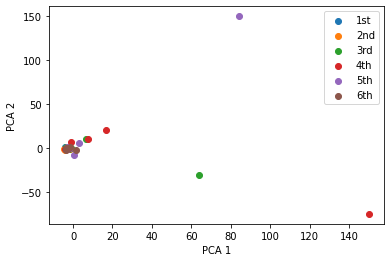

In [15]:
############PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


pca = PCA(n_components=6)

X_PCA = pca.fit_transform(Xmus)


plt.scatter(X_PCA[:23, 0],X_PCA[:23, 1], label='1st')
plt.scatter(X_PCA[24:48, 0],X_PCA[24:48, 1], label='2nd')
plt.scatter(X_PCA[49:72, 0],X_PCA[49:72, 1], label='3rd')
plt.scatter(X_PCA[73:98, 0],X_PCA[73:98, 1], label='4th')
plt.scatter(X_PCA[99:123, 0],X_PCA[99:123, 1], label='5th')
plt.scatter(X_PCA[124:137, 0],X_PCA[124:137,1], label='6th')

plt.legend()

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()
